<strong>Sentiment Analysis<br>
Data Science Essentials Final Project<br>
Amy Camp Fall 2016<p>

Goal<br>
Training a Naive Bayes model to classify future SMS messages into either Love or Depression_Suicide_Self_Injury.</strong><br>
Logistic Regression>Random Forest>Naive Bayes><br>
Measuring the models' performance using AUC, Accuracy, Precision, Recall & finally feeding in comment to test model<br>

SMS Messages Data<br>
<li>6/2011 Natural Language Data Pulled From messages.blogspot.com
<li>Clean, Remove Gaps, encoding, & Create File able to be Imported into Jupyter Notebook
<li>Read in file, added column headers, 
<li>Converted type data into a binary indicator variable(0/1), transformed the text to a sparse matrix of TFIDF vectors
<li>Created models and visulizations
<li>Measure
<li>Test model's ability to classify future SMS Messages<br>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [2]:
df= pd.read_csv("SMSBlogCollection",sep='\t', names=['type', 'post'])
#adding column names

In [3]:
df.head()
#looking at top entries within the dataset

,type,post
0,Depression_Suicide_Self_Injury,Not knowing and understanding true selfworth
1,Depression_Suicide_Self_Injury,Don't hold strong opinions about things you do...
2,Love,The only guys worth loving are the ones that w...
3,Depression_Suicide_Self_Injury,"My time has come, and so I'm gone. To a better..."
4,Love,"As I laid there on his chest, listening to his..."


In [4]:
df.post.count()

335

In [5]:
df.type.count()

335

In [6]:
df[df['post'].isnull()]
#no missing values in post

,type,post


In [7]:
df[df['type'].isnull()]
#no missing values in type

,type,post


In [8]:
df.type.value_counts()

Depression_Suicide_Self_Injury    207
Love                              128
Name: type, dtype: int64

Populating the interactive namespace from numpy and matplotlib


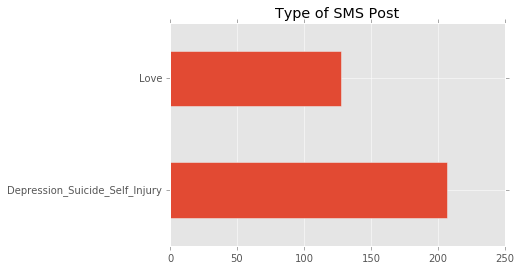

In [9]:
%pylab inline
#from matplotlib import pyplot as plt
plt.style.use('ggplot')
df.type.value_counts().plot(kind='barh')
title('Type of SMS Post')
#need to convert type data into a binary indicator variable(0/1)

In [10]:
df.dtypes

type    object
post    object
dtype: object

In [11]:
pd.get_dummies(df.type)
##using get_dummies to return a binary indicator variable for each category.
##aka converting the message types Love and Depression_Suicide_Self_Injury to a binary indicator variable(0/1)

,Depression_Suicide_Self_Injury,Love
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [12]:
pd.get_dummies(df.type)
df['type'] = pd.get_dummies(df.type)['Depression_Suicide_Self_Injury']
#type is now Love = 0 & Depression_Suicide_Self_Injury = 1,
#w/ encoding variables, I'll drop one category to keep from having two perfectly colinear variables.   
#taking one, and reassign it

In [13]:
df.head()
#checking to see changes are reflected 

,type,post
0,1.0,Not knowing and understanding true selfworth
1,1.0,Don't hold strong opinions about things you do...
2,0.0,The only guys worth loving are the ones that w...
3,1.0,"My time has come, and so I'm gone. To a better..."
4,0.0,"As I laid there on his chest, listening to his..."


Now I need to transform the txt to a sparse matrix of TFIDF vectors & assign y

In [14]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [15]:
y = df.type

In [16]:
X= vectorizer.fit_transform(df.post)

In [17]:
y.shape
X.shape

(335, 1107)

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=42)

Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)

In [20]:
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print "Logistic accuracy is %3.3f" % accuracy_score(y_test,model.predict(X_test))
#Logistic model is correct 97.6% of the time

Logistic accuracy is 0.976


In [22]:
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %3.3f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))



---Logistic Model---
Logistic AUC = 0.973
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96        27
        1.0       0.98      0.98      0.98        57

avg / total       0.98      0.98      0.98        84



Logistic - the model is fairly precise. 96% of the time someone wrote a SMS Message Love they actually did

In [23]:
n_estimators = [30,40,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]

from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [24]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [30, 40, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [25]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
best_rfc = estimator.best_estimator_
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.928571428571


In [27]:
y_hat = best_rfc.predict(X_test)

In [28]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.928571428571


In [29]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.84      0.96      0.90        27
        1.0       0.98      0.91      0.95        57

avg / total       0.94      0.93      0.93        84



In [30]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[26  1]
 [ 5 52]]


Precision: 54 / 54 + 1 = .98<br>
Recall: 54 / 54 + 3 = .95

K-Fold Cross Validation - to keep from overfitting to our test dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [32]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, X, y, cv=30)

In [33]:
scores

array([ 0.83333333,  0.91666667,  1.        ,  0.91666667,  1.        ,
        0.91666667,  1.        ,  0.91666667,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.81818182,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.90909091,  1.        ,
        0.90909091,  1.        ,  0.9       ,  1.        ,  0.9       ])

In [34]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %2f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.964545 +/-  0.022295
95 percent probability that if this experiment were repeated over and over the average score would be between 0.942251 and 0.986840


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.973014794686


In [36]:
#Fitting a Naive Bayes Classifier
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
#Measure model's success using roc_auc_score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("AUC: " + str(auc))
#improved over previous AUC: 0.951591511936

AUC: 0.98418972332


In [38]:
#feeding in Positive comment to test model
message_posts_array=np.array(["i love pretty carnations"])

message_posts_vector = vectorizer.transform(message_posts_array)

print clf.predict(message_posts_vector)
#0 assignment expected and returned

[ 0.]


### SMS Messages, Post belonging to Positive & Negative groups

Looking for the most negative post using Blog Message Data.<br>

<strong>T</strong>here are many more negative post than positive:<br>
<li>Humans tend to seek human interaction & acceptance; those feeling love maybe spending time growing those relationships, those feeling lonely/depressed may be seeking a connection from posting on social media<br>
<li>Group think can cause the number of entries to grow<br>
<li>Negativity can escalate in effort to out do last media post(get more likes)<br>
    
<strong>U</strong>sing Graph Theory to identify the leading negative post<br>

In [39]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
#Reading in data
df= pd.read_csv("SMSBlogCollection1.csv", index_col='post')

In [41]:
df.head()

,Depression_Suicide_Self_Injury,Love
post,,
Not knowing and understanding true selfworth,1,0
Don't hold strong opinions about things you don't understand.A,1,0
The only guys worth loving are the ones that will take time just to be with you.,0,1
"My time has come, and so I'm gone. To a better place, far beyond. I love you all as you can see. But it's better now, because I'm free.",1,0
"As I laid there on his chest, listening to his heart beat, I knew at that moment that I loved him.",0,1


In [42]:
df.shape

(335, 2)

In [43]:
post_x_groups = df

In [44]:
df.T

post,Not knowing and understanding true selfworth,Don't hold strong opinions about things you don't understand.A,The only guys worth loving are the ones that will take time just to be with you.,"My time has come, and so I'm gone. To a better place, far beyond. I love you all as you can see. But it's better now, because I'm free.","As I laid there on his chest, listening to his heart beat, I knew at that moment that I loved him.",Love the feeling of being in love.,Sometimes you need to run away just to see who will follow you.,"It's hard to answer the question ""what's wrong"" when nothings right.","I'm tired of trying, sick of crying, I know I've been smiling, but inside I'm dying.",Maybe one day it will be ok again. That's all I want. I don't care what it takes. I just want to be ok again.,...,"True love is knowing a persons faults, and loving them even more for them.","I may forget what you said, but I'll never forget�how you made me feel.","Sometimes I wonder if life is really worth it, then I look at your smile and I know it is.","There's always that one special person that no matter thet they do to you, you just can't let them go.",You know your in love�when the hardest thing to say is good-bye.,"I look at him as a friend, then I realized I loved him.","I believe in whatever gets you through the night. Night is the hardest time to be alive. For me, anyway. It lasts so long, and four am knows all my secrets. Four am is when my dreams die.","No matter what you do or say, there's nothing that you can do to make people understand you.---Kurt Cobain","Damaged people are dangerous, they know they know they can survive.","People dislike alcoholics, but they still drink at parties. People sit in non-smoking section in restaurants, but still enjoy the occasional nicotine jolt. People have strong feelings against self-injurers, but they also take all their emotions out on other people."
Depression_Suicide_Self_Injury,1,1,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,1,1,1,1
Love,0,0,1,0,1,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0


In [45]:
groups_x_post = df.T
print post_x_groups.shape
print groups_x_post.shape

(335, 2)
(2, 335)


In [46]:
post_adj =  post_x_groups.dot(groups_x_post)
post_adj.shape
#post_adj.head()

(335, 335)

In [47]:
G = nx.from_numpy_matrix(post_adj.values)
G = nx.relabel_nodes(G, dict(enumerate(post_adj.columns)))

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


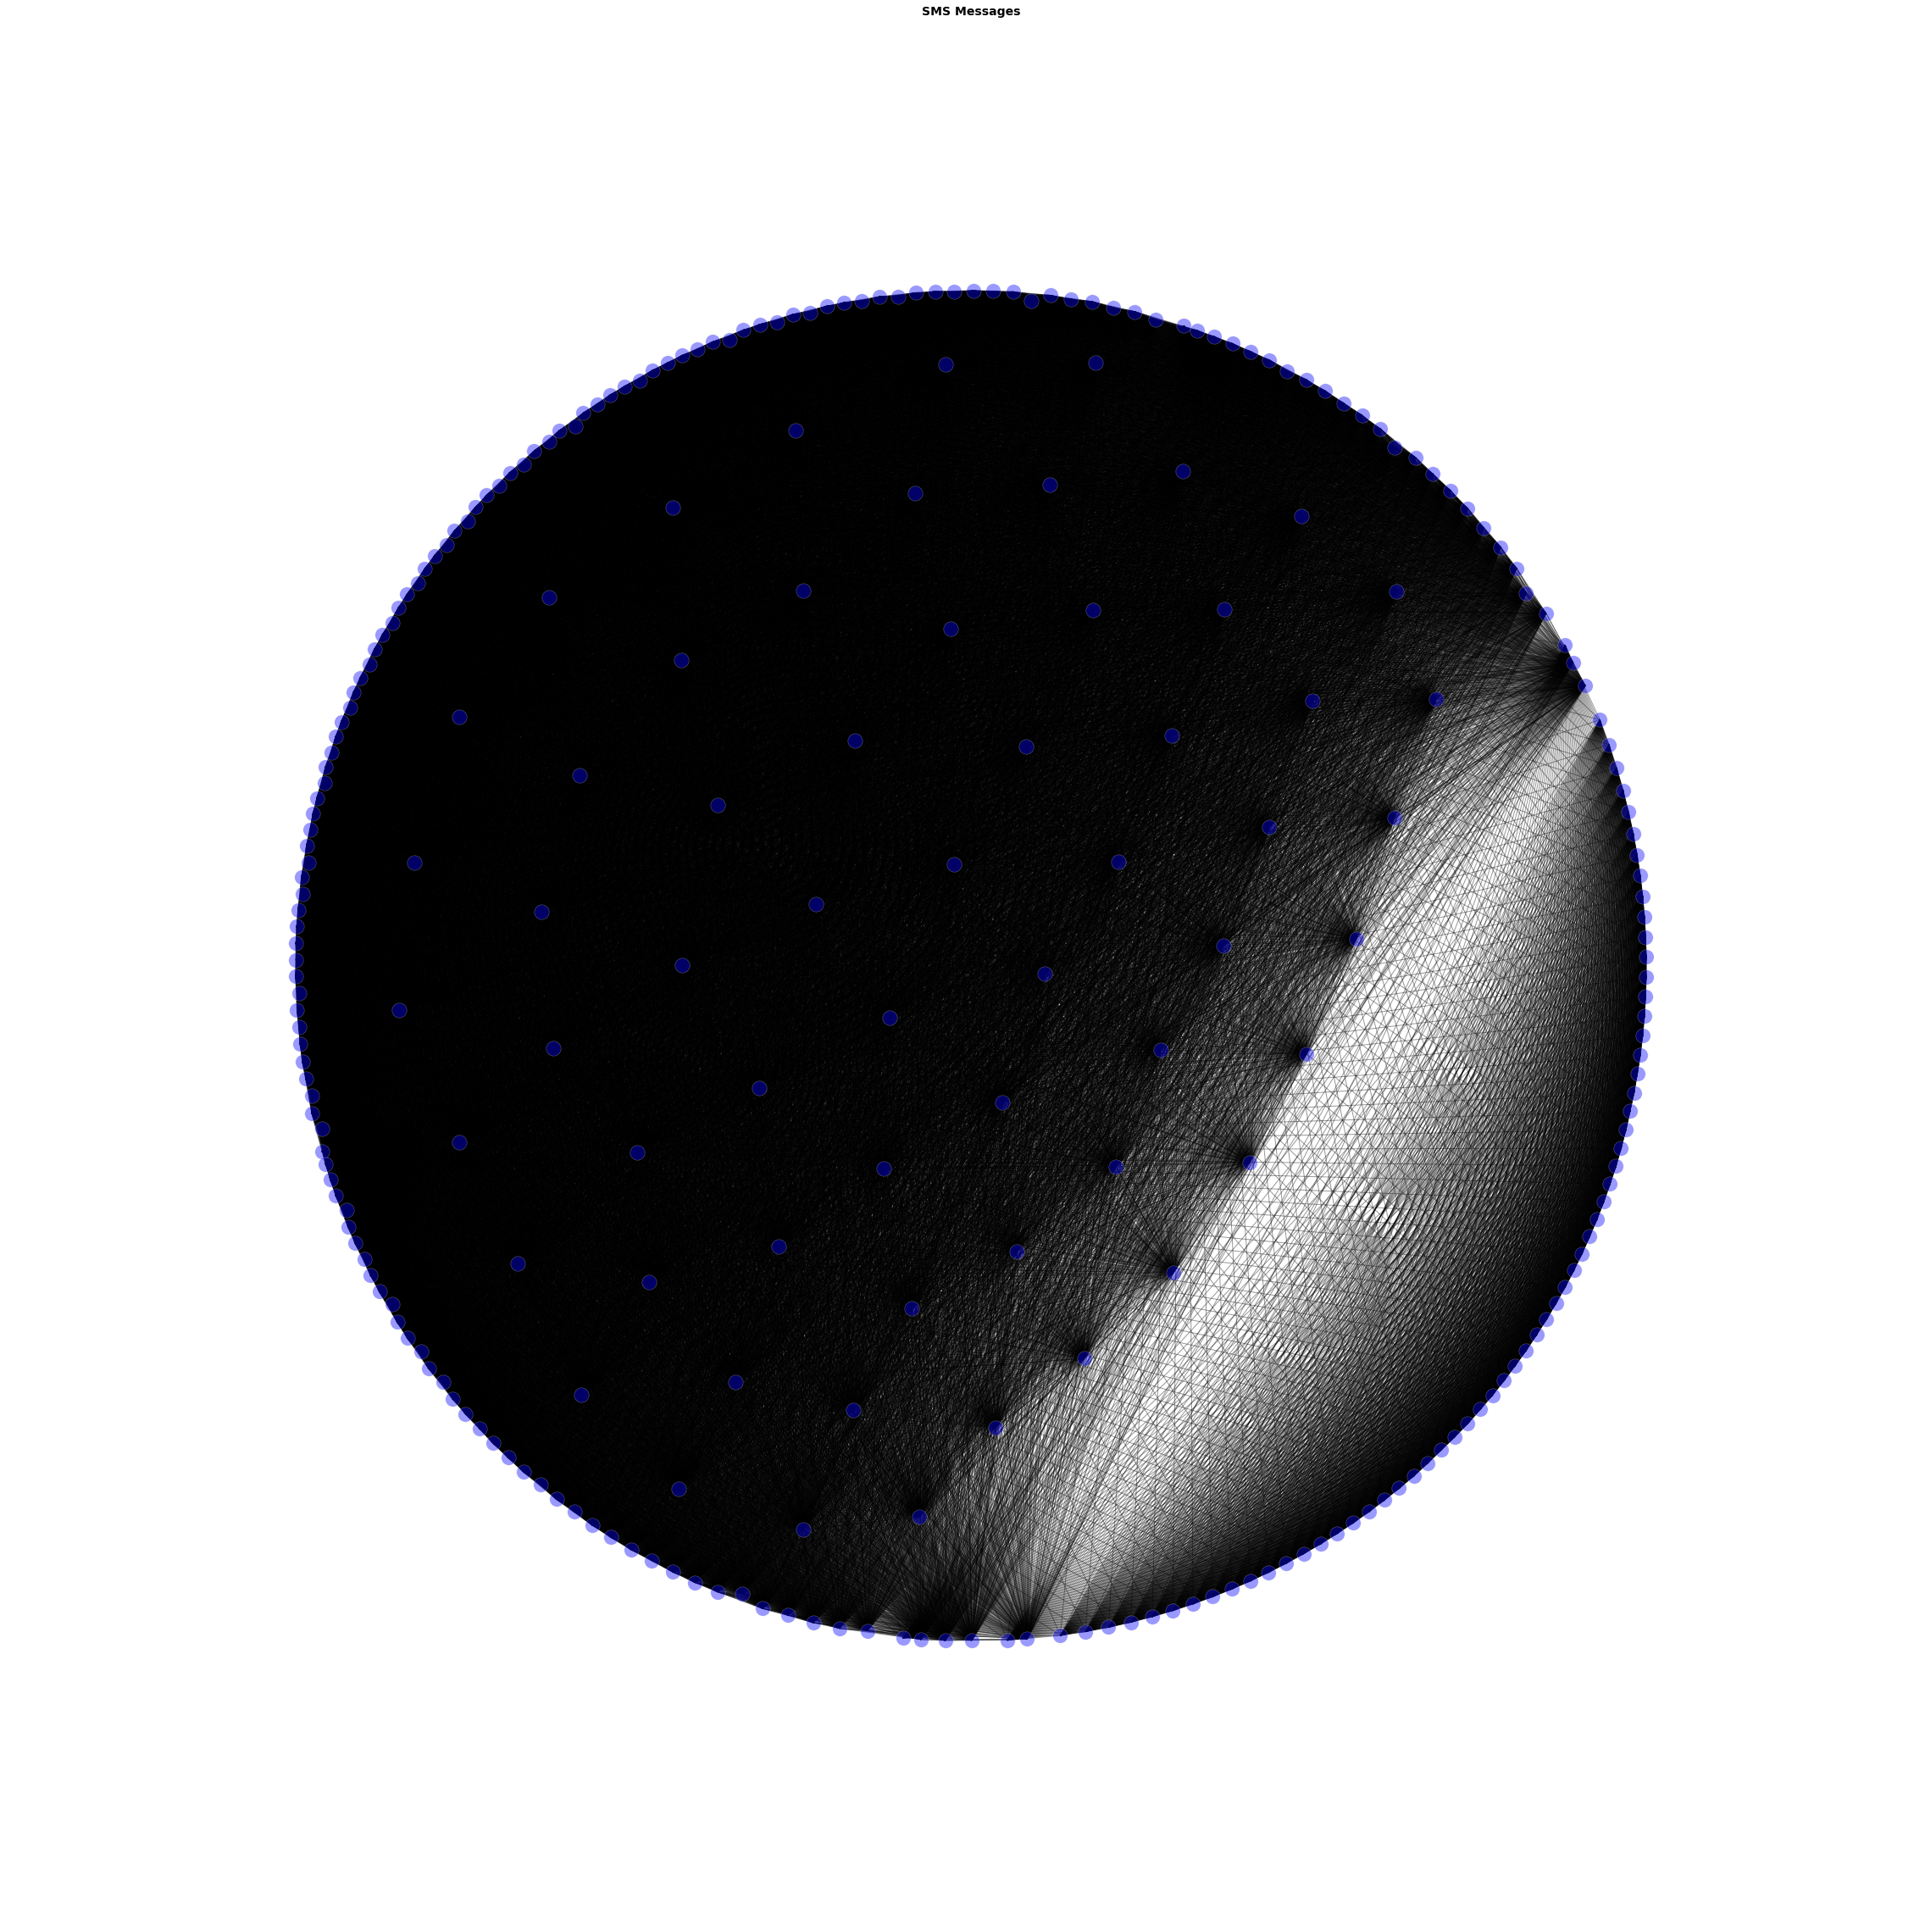

In [48]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.77)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("SMS Messages", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

Measuring the importance of the post

In [49]:
centrality=nx.eigenvector_centrality(G)

In [50]:
post_list = []
for node in centrality:
    post_list.append((node,centrality[node]))
    
sorted_post_list = post_list.sort(key=lambda x: x[1])

In [51]:
most_important = sorted(post_list, key=lambda x: x[1], reverse=True)[:1]
least_important = sorted(post_list, key=lambda x: x[1])[:1]
most_important

[("Let me give you some advice-- if you are gonna lie about something at least make sure it's worth lying about.",
  0.06950480468324668)]

In [52]:
least_important

[('To love someone when there is no chance of that love ever thriving, that is romance.',
  1.0171862941747071e-06)]

Increasing the variables from 2 may help in finding different networks and their centrality.  Authors not being identified and only using one website impacted the models used. The lack of data made this dataset not the best for this model.